In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv ('train.csv')

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_train["category"]=le.fit_transform(data_train["category"])

In [6]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,5
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,3
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,2
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,7
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,3


In [7]:
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']

In [8]:
data_train['views'] = pd.to_numeric(data_train['views'])
data_train['likes'] = pd.to_numeric(data_train['likes'])
data_train['dislikes'] = pd.to_numeric(data_train['dislikes'])
data_train['comment'] = pd.to_numeric(data_train['comment'])
data_train['adview'] = pd.to_numeric(data_train['adview'])

In [9]:
column_vidid = data_train['vidid']

In [10]:
data_train["vidid"]=le.fit_transform(data_train["vidid"])
data_train["published"]=le.fit_transform(data_train["published"])

In [11]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,5
1,2741,2,1707,56,2,6,2185,PT9M30S,3
2,8138,1,2023,25,0,2,2094,PT2M16S,2
3,9005,6,620860,777,161,153,2119,PT4M22S,7
4,122,1,666,1,0,0,2091,PT31S,3


In [12]:
duration = list(data_train['duration'])
for i in range(len(duration)):
  duration[i]=duration[i][2:]
for i in range(len(duration)):
  h=m=s=value=0
  for j in duration[i]:
    if j=='H':
      h=value
      value=0
    elif j=='M':
      m=value
      value=0
    elif j=='S':
      s=value
      value=0
    else:
      value = (value*10)+int(j)
  time_duration=(h*3600)+(m*60)+s
  duration[i] = time_duration

In [13]:
duration=pd.Series(duration)
data_train['duration']=duration.values

In [14]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,5
1,2741,2,1707,56,2,6,2185,570,3
2,8138,1,2023,25,0,2,2094,136,2
3,9005,6,620860,777,161,153,2119,262,7
4,122,1,666,1,0,0,2091,31,3


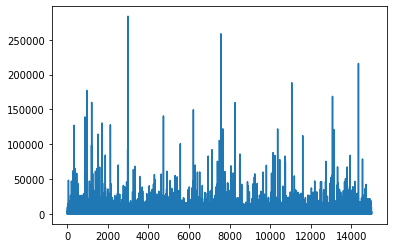

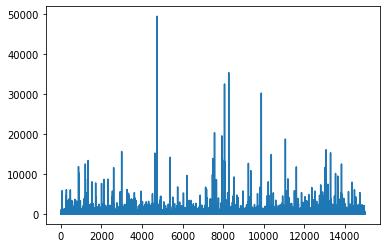

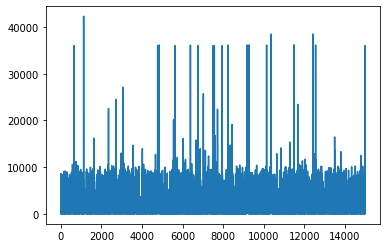

In [15]:

plt.plot(data_train['likes'])
plt.show()
plt.plot(data_train['dislikes'])
plt.show()
plt.plot(data_train['duration'])
plt.show()

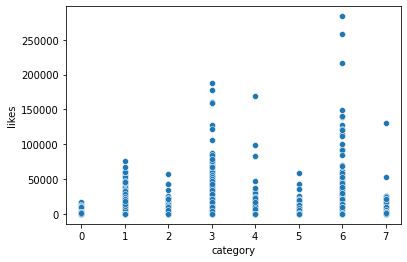

In [16]:
sns.scatterplot(data=data_train,x="category",y="likes")

In [17]:
"""data_train = data_train[data_train['likes']<200000]
data_train = data_train[data_train['dislikes']<35000]
data_train = data_train[data_train['duration']<30000]"""

"data_train = data_train[data_train['likes']<200000]\ndata_train = data_train[data_train['dislikes']<35000]\ndata_train = data_train[data_train['duration']<30000]"

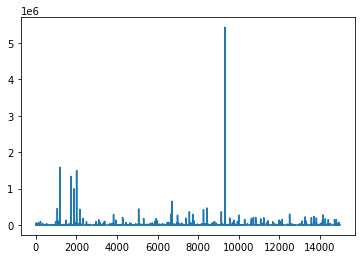

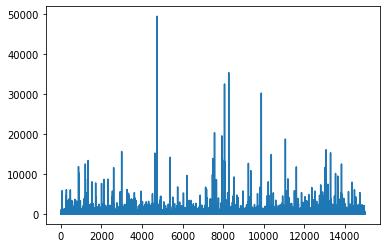

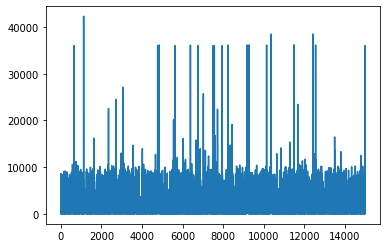

In [18]:

plt.plot(data_train['adview'])
plt.show()
plt.plot(data_train['dislikes'])
plt.show()
plt.plot(data_train['duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


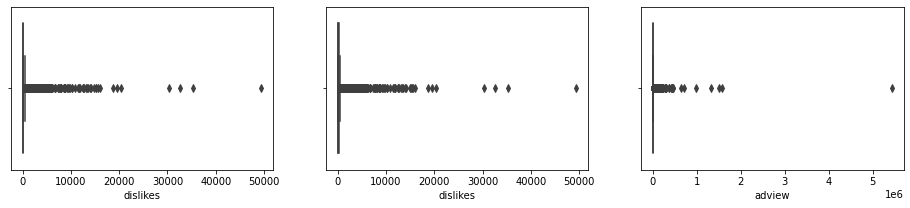

In [19]:
plt.rcParams['figure.figsize']=(16,3)
plt.subplot(1,3,1)
sns.boxplot(data_train['dislikes'])
plt.subplot(1,3,2)
sns.boxplot(data_train['dislikes'])
plt.subplot(1,3,3)
sns.boxplot(data_train['adview'])
plt.show()

In [20]:
data_train = data_train[data_train['adview']<2000000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


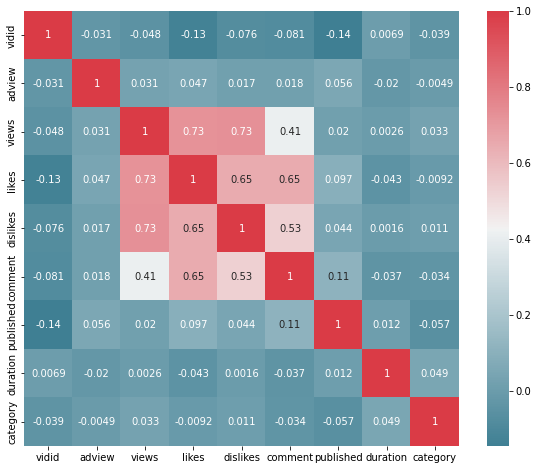

In [21]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
correlation = data_train.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [22]:
data_train = data_train.drop(['category'],axis=1)

In [23]:
Y_train = pd.DataFrame(data = data_train.iloc[:,1].values,columns = ['target'])
data_train = data_train.drop(['vidid'],axis=1)
data_train = data_train.drop(['adview'],axis=1)
#data_train = data_train.drop(['category'],axis=1)
data_train = data_train.drop(['duration'],axis=1)
data_train.head()

,views,likes,dislikes,comment,published
0,1031602,8523,363,1095,2168
1,1707,56,2,6,2185
2,2023,25,0,2,2094
3,620860,777,161,153,2119
4,666,1,0,0,2091


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


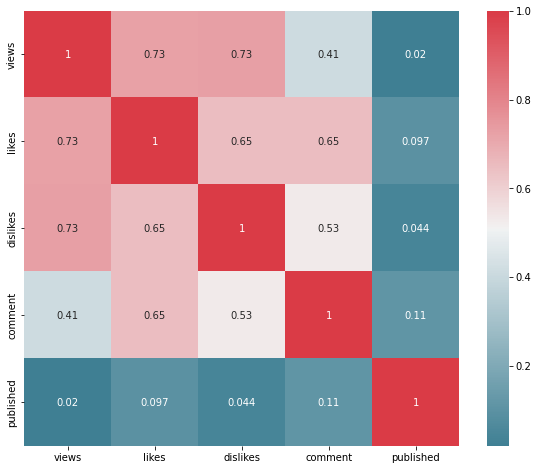

In [24]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
correlation = data_train.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size = 0.2, random_state = 42)

In [26]:
X_train

,views,likes,dislikes,comment,published
13440,86739,117,9,4,1217
9523,1419766,887,362,232,1547
3012,26086,19,0,9,966
1888,305445,3662,45,555,1484
11378,737649,1702,96,53,1127
...,...,...,...,...,...
5316,31648,140,24,14,1925
13748,1804,4,1,0,1049
5522,204817,86,35,11,1237
883,1361366,1384,757,185,2145


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
from sklearn import metrics
def performance(X_test, y_test, model):
  prediction = model.predict(X_test)
  print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
  print("Mean Squared Error: ", metrics.mean_squared_error(y_test,prediction))
  print("Root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
  print("R2_score: ", metrics.r2_score(y_test,prediction))

In [29]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
performance(X_test,y_test, linear_regression)


Mean Absolute Error:  3718.5077955538263
Mean Squared Error:  836004684.2524498
Root mean squared error:  28913.745593617747
R2_score:  -0.006252663202638731


In [30]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
performance(X_test,y_test, decision_tree)

Mean Absolute Error:  1885.6994535519125
Mean Squared Error:  387131474.96516395
Root mean squared error:  19675.6569131799
R2_score:  0.5340312261030009


In [31]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth , min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
performance(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error:  3471.3169137722534
Mean Squared Error:  619835526.201036
Root mean squared error:  24896.496263551544
R2_score:  0.2539382126248251


In [32]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
performance(X_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:  3718.5077955538263
Mean Squared Error:  836004684.2524498
Root mean squared error:  28913.745593617747
R2_score:  -0.006252663202638731


In [33]:
import tensorflow as tf
import keras
from keras.layers import Dense

In [34]:
ann = keras.models.Sequential([
                               Dense(8, activation="relu",input_shape=X_train.shape[1:]),
                               Dense(8,activation="relu"),Dense(1)
                               ])

optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
performance(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767406720.0000 - mean_squared_error: 767406720.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767400256.0000 - mean_squared_error: 767400256.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767382208.0000 - mean_squared_error: 767382208.0000
Epoch 4/100
366/366 [==============================] - 1s 1ms/step - loss: 767347008.0000 - mean_squared_error: 767347008.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767296640.0000 - mean_squared_error: 767296640.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767227840.0000 - mean_squared_error: 767227840.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 767139008.0000 - mean_squared_error: 767139008.0000
Epoch 8/100
366/366 [==============================] - 1s 1ms/step - loss: 767033152.0000 - mean_squared_error:

In [35]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [36]:
ann.save("ann_youtubeadview.h5")

In [37]:
from keras.models import load_model
model_ann = load_model("ann_youtubeadview.h5")

In [38]:
model_tree= joblib.load("decisiontree_youtubeadview.pkl")

In [39]:
data_test = pd.read_csv ('test.csv')

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_test["category"]=le.fit_transform(data_test["category"])

In [41]:
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']

data_test['views'] = pd.to_numeric(data_test['views'])
data_test['likes'] = pd.to_numeric(data_test['likes'])
data_test['dislikes'] = pd.to_numeric(data_test['dislikes'])
data_test['comment'] = pd.to_numeric(data_test['comment'])

column_vidid = data_test['vidid']
data_test["vidid"]=le.fit_transform(data_test["vidid"])
data_test["published"]=le.fit_transform(data_test["published"])

In [42]:
duration = list(data_test['duration'])
for i in range(len(duration)):
  duration[i]=duration[i][2:]
for i in range(len(duration)):
  h=m=s=value=0
  for j in duration[i]:
    if j=='H':
      h=value
      value=0
    elif j=='M':
      m=value
      value=0
    elif j=='S':
      s=value
      value=0
    else:
      value = (value*10)+int(j)
  time_duration=(h*3600)+(m*60)+s
  duration[i] = time_duration

In [43]:
duration=pd.Series(duration)
data_test['duration']=duration.values

In [44]:
data_test = data_test.drop(['vidid'],axis=1)
data_test = data_test.drop(['category'],axis=1)
data_test = data_test.drop(['duration'],axis=1)
data_test.head()

,views,likes,dislikes,comment,published
0,440238,6153,218,1377,2053
1,1040132,8171,340,1047,1825
2,28534,31,11,1,1009
3,1316715,2284,250,274,116
4,1893173,2519,225,116,1892


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [46]:
prediction_ann = model_ann.predict(X_test)

In [47]:
predict_tree = model_tree.predict(X_test)

In [48]:
predict_tree[:100]

array([1.0000e+00, 1.0000e+00, 4.0000e+00, 5.8000e+01, 1.5000e+01,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
       1.4000e+01, 1.0000e+00, 3.5050e+03, 8.0000e+00, 1.0000e+00,
       1.0000e+00, 2.0000e+00, 5.0000e+00, 6.0000e+00, 6.0000e+00,
       1.0000e+00, 1.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00, 1.0000e+00,
       3.0000e+00, 1.0000e+00, 8.0000e+00, 2.0000e+00, 1.0000e+00,
       4.7100e+02, 1.3038e+04, 1.0000e+00, 1.0000e+00, 1.4000e+02,
       1.3000e+01, 6.0000e+00, 1.0000e+00, 9.0000e+00, 2.0000e+00,
       1.0000e+00, 2.0000e+00, 7.0000e+00, 1.0000e+00, 1.6000e+01,
       3.1229e+04, 2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       2.7780e+04, 1.0000e+00, 2.0000e+00, 2.0000e+00, 2.5667e+04,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
       1.0000e+00, 1.0000e+00, 5.4000e+01, 7.0000e+00, 1.0000e

In [49]:
prediction=pd.DataFrame(predict_tree)

In [50]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [51]:
prediction = prediction.rename(columns={0: "Adview"})

In [52]:
prediction.head()

,Adview
0,1.0
1,1.0
2,4.0
3,58.0
4,15.0


In [53]:
prediction.to_csv('predictions.csv')